In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


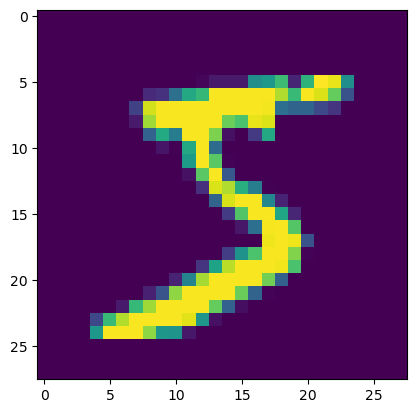

5


In [9]:
plt.imshow(x_train[0])
plt.show()
print(y_train[0])

In [10]:
# flattening the image and normalizing
x_train = x_train.reshape(x_train.shape[0], -1)/225.0
x_test = x_test.reshape(x_test.shape[0], -1)/225.0

In [11]:
# converting label into one hot encoding format
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [12]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 784) (60000, 10)
(10000, 784) (10000, 10)


#### Sequential Model

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [14]:
model = Sequential()
model.add(Dense(256, activation ='relu', input_shape = (784,)))
model.add(Dense(256, activation ='relu'))
model.add(Dense(10, activation ='softmax'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.fit(x_train, y_train, epochs = 10, batch_size = 512)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7925 - loss: 0.7744
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9527 - loss: 0.1643
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9678 - loss: 0.1085
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9791 - loss: 0.0728
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9849 - loss: 0.0539
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9863 - loss: 0.0449
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9894 - loss: 0.0365
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9932 - loss: 0.0249
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9941 - loss: 0.0220
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9950 - loss: 0.0181


In [19]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.9747 - loss: 0.0795


[0.0700806975364685, 0.9775999784469604]

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 807,968 (3.08 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 538,646 (2.05 MB)

#### Non-Sequential complex Models

In [21]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Concatenate, Input

In [22]:
input = Input(shape = ([784,]))

hidden_1 = Dense(256, activation ='relu')(input)
hidden_2 = Dense(256, activation ='relu')(hidden_1)
hidden_3 = Dense(256, activation ='relu')(input)

concat = Concatenate()([hidden_2, hidden_3])

output = Dense(10, activation = 'softmax')(concat)

model = Model(inputs = [input], outputs = [output])
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 784)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 256)       │    200,960 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 256)       │     65,792 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 256)       │    200,960 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 512)       │          0 │ dense_4[0][0],    │
│ (Concatenate)       │                   │            │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 10)        │      5,130 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 472,842 (1.80 MB)

 Trainable params: 472,842 (1.80 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs = 10, batch_size = 512)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8088 - loss: 0.6785
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9571 - loss: 0.1499
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9733 - loss: 0.0945
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9806 - loss: 0.0643
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9853 - loss: 0.0506
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9885 - loss: 0.0403
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9926 - loss: 0.0267
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9944 - loss: 0.0210
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9955 - loss: 0.0171
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9958 - loss: 0.0156


In [25]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - accuracy: 0.9778 - loss: 0.0762


[0.06444593518972397, 0.9814000129699707]

#### Custom Layers and Models

In [27]:
from tensorflow.keras import layers

In [37]:
class MyLayer(layers.Layer):
    # constructor function
    def __init__(self, units, input_dim, activation):
        super(MyLayer, self).__init__()
        
        # initialize weights and bias
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(initial_value = w_init(shape= (input_dim, units), dtype = 'float32'), trainable = True)

        b_init = tf.random_normal_initializer()
        self.b = tf.Variable(initial_value = w_init(shape= (units, ), dtype = 'float32'), trainable = True)

        self.activation = activation
        
    # forward pass computation
    def call(self, inputs):
        linear_op = tf.add(tf.matmul(inputs, self.w), self.b)
        if self.activation == 'relu':
            return tf.nn.relu(linear_op)
        elif self.activation == 'softmax':
            return tf.nn.softmax(linear_op)
        return linear_op

In [38]:
class MyModel(tf.keras.Model):
    def __init__(self, n_input, n_hidden1, n_hidden2, n_classes):
        super(MyModel, self).__init__()
        
        self.layer1 = MyLayer(n_hidden1, n_input, 'relu')
        self.layer2 = MyLayer(n_hidden2, n_hidden1, 'relu')
        self.output_layer = MyLayer(n_classes, n_hidden2, 'softmax')

    def call(self, inputs):
        x = self.layer1(inputs)
        x = self.layer2(x)
        return self.output_layer(x)
        

In [39]:
model = MyModel(784, 256, 256, 10)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs = 10, batch_size = 512)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0760 - loss: 2.3363
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0756 - loss: 2.3361
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0751 - loss: 2.3361
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0759 - loss: 2.3365
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0757 - loss: 2.3359
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0774 - loss: 2.3369
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0770 - loss: 2.3358
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0747 - loss: 2.3362
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0762 - loss: 2.3358
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0779 - loss: 2.3356


In [40]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - accuracy: 0.0699 - loss: 2.3353


[2.339095115661621, 0.07069999724626541]